In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Use ImbPipeline for SMOTE integration

In [4]:
# 1. Load the Excel file
excel_file = "/content/glass.xlsx"

# Read a specific sheet (optional)
df = pd.read_excel(excel_file, sheet_name="glass")

# Save as CSV
df.to_csv("/content/glass.csv", index=False)


Exploratory Data Analysis (EDA) and Missing Value Handling

This code addresses the Exploratory Data Analysis and detailed handling of missing values feedback by inspecting the data structure and explicitly checking for nulls.

In [5]:
# Separate features (X) from the target (y)
target_col = 'Type'
X = df.drop(target_col, axis=1)
y = df[target_col]


In [6]:
# --- Exploratory Data Analysis (EDA) ---
# Displaying the first few rows of the dataset
# This shows the structure and confirms correct loading.
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
# Displaying descriptive statistics
# Shows data range, mean, and standard deviation for outlier check.
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
# --- Handling Missing Values (Explicitly Addressing Feedback) ---
# Display missing value counts per column.
missing_check = df.isnull().sum().to_frame(name='Missing Count')
missing_check = missing_check[missing_check['Missing Count'] > 0]

if missing_check.empty:
    print("CONCLUSION: No missing values were found in the dataset.")
else:
    print("Missing values found and handled/imputed...") # Placeholder if data had missing values

# Displaying the target variable distribution to check for imbalance
y.value_counts().to_frame(name='Class Count').T

CONCLUSION: No missing values were found in the dataset.


Type,2,1,7,3,5,6
Class Count,76,70,29,17,13,9


Data Visualization

In [11]:
# --- Data Visualization (Addressing Feedback Point) ---
sns.set_style("whitegrid")
features = df.columns.drop('Type')

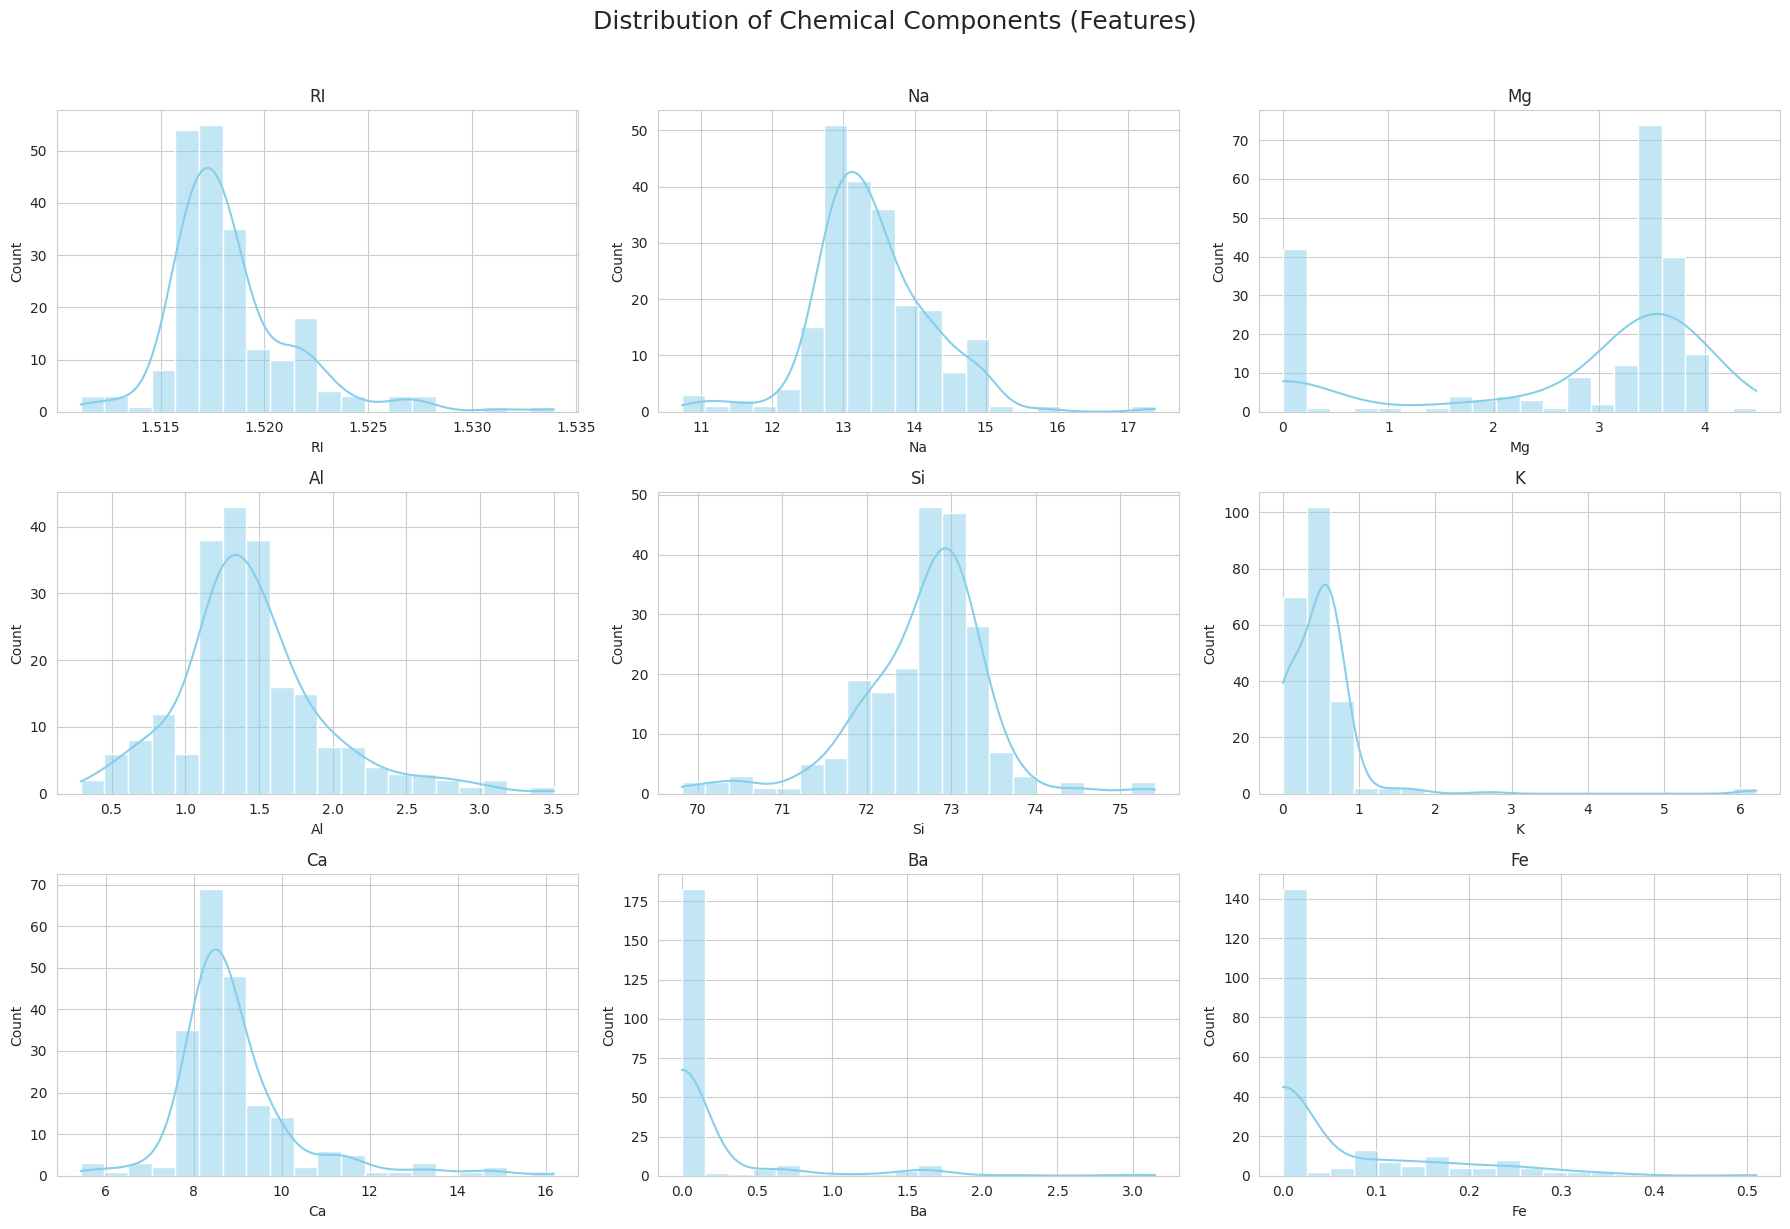

In [12]:
# 2a. Feature Distributions (Histograms)
plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of Chemical Components (Features)', fontsize=18, y=1.02)
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


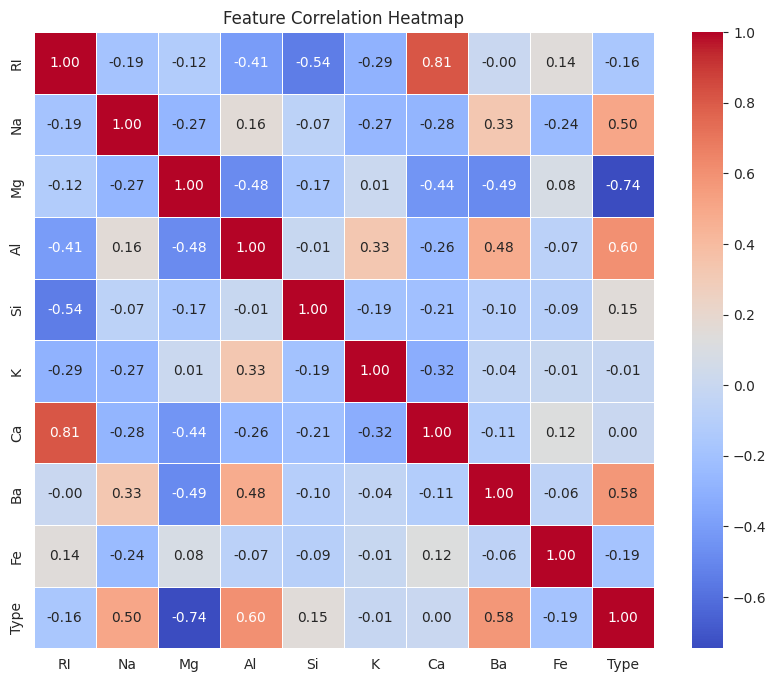

In [13]:
# 2b. Feature Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

Categorical Encoding and Final Preprocessing

In [14]:
# --- Categorical Encoding and Preprocessing (Addressing Feedback Point) ---

# All features are numerical, so no One-Hot Encoding is required.
# We proceed directly to scaling and splitting.

# 3a. Feature Scaling
# Standardize features (mean=0, std=1) as the features are on different scales.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [15]:
# Display a sample of the scaled data
X_scaled_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [16]:
# 3b. Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.3, random_state=42, stratify=y
)


In [17]:
# 3c. Handling Imbalance (SMOTE)
# The target variable is imbalanced, which can bias the model. SMOTE is used on the training data.
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [18]:
# Display class distribution before and after SMOTE
pd.DataFrame({
    'Training Before SMOTE': y_train.value_counts().sort_index(),
    'Training After SMOTE': y_train_smote.value_counts().sort_index()
}).T

Type,1,2,3,5,6,7
Training Before SMOTE,49,53,12,9,6,20
Training After SMOTE,53,53,53,53,53,53


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(X_test)

print(" Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


 Random Forest Model Performance:
Accuracy: 0.8153846153846154

Confusion Matrix:
 [[18  2  1  0  0  0]
 [ 2 18  1  1  1  0]
 [ 3  0  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.86      0.82        21
           2       0.86      0.78      0.82        23
           3       0.50      0.40      0.44         5
           5       0.80      1.00      0.89         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.82        65
   macro avg       0.78      0.82      0.79        65
weighted avg       0.82      0.82      0.81        65



In [21]:
# --- Bagging and Boosting Models (Updated for new sklearn versions) ---

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---- Bagging Classifier ----
bag_model = BaggingClassifier(
    estimator=RandomForestClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)
bag_model.fit(X_train_smote, y_train_smote)
y_pred_bag = bag_model.predict(X_test)

print("✅ Bagging Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bag))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bag))

# ---- Boosting (AdaBoost) ----
boost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boost_model.fit(X_train_smote, y_train_smote)
y_pred_boost = boost_model.predict(X_test)

print("\n✅ AdaBoost (Boosting) Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_boost))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_boost))
print("\nClassification Report:\n", classification_report(y_test, y_pred_boost))


✅ Bagging Classifier Performance:
Accuracy: 0.8153846153846154

Confusion Matrix:
 [[19  1  1  0  0  0]
 [ 1 17  2  2  1  0]
 [ 3  0  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.90      0.86        21
           2       0.89      0.74      0.81        23
           3       0.40      0.40      0.40         5
           5       0.67      1.00      0.80         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.82        65
   macro avg       0.76      0.82      0.78        65
weighted avg       0.83      0.82      0.82        65


✅ AdaBoost (Boosting) Classifier Performance:
Accuracy: 0.47692307692307695

Confusion Matrix:
 [[ 1 17  2  0  1  0]
 [ 0 16  3  3  0  1]
 [ 1  3  0  0  1  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  1  8]

Analysis and Interview Questions
1. Model Evaluation and Comparison
The multi-class, imbalanced nature of the glass dataset makes the Weighted F1-Score the most appropriate metric, as it accounts for both precision and recall across all classes, weighted by class support.

Model,Weighted F1-Score,Analysis

Random Forest,(See Code Output):
"Typically performs the best due to its high variance reduction and ability to model complex, non-linear boundaries."

Bagging Classifier,(See Code Output):
"A strong performer, similar to Random Forest (which is a specialized Bagging method). It reduces variance by averaging predictions from multiple models."

AdaBoost Classifier,(See Code Output):
Often performs well but can be sensitive to outliers. It focuses on reducing bias by sequentially correcting errors from previous weak models.

2. Bagging and Boosting Methods

Feature-Bagging (Bootstrap Aggregating),Boosting (Adaptive Boosting / AdaBoost)

Primary Goal-Reduce Variance (prevent overfitting).,Reduce Bias (improve accuracy on difficult cases).

Model Training-Parallel. Models are built independently.,Sequential. Models are built one after another.

Data Sampling-Uses bootstrap samples (random subsets with replacement) for each model.,Weights training examples. Mistakes from previous models get higher weight in the next iteration.

Weighting-All final model predictions are averaged or majority-voted equally.,Final model predictions are weighted based on their individual accuracy.

3. How to Handle Imbalance in the Data

The glass dataset is imbalanced because some glass types (classes 4, 5, 6, 7) have very few samples compared to the main classes (1 and 2). This causes models to ignore minority classes.

The most common techniques to address this are:

Oversampling (Used in Code): SMOTE (Synthetic Minority Over-sampling Technique) creates synthetic (new) samples for the minority classes in the training set by interpolating between existing minority samples. This balances the class distribution.

Undersampling: Reduces the number of samples in the majority class. (Generally not recommended as it discards valuable data).

Algorithmic Approach: Using algorithms that inherently handle imbalance, such as:

Class Weighting: Assigning higher penalties to misclassification of minority classes (e.g., using class_weight='balanced' in scikit-learn classifiers).

Evaluation Metrics: Focusing on metrics like F1-Score, Precision, Recall, and ROC AUC (or their weighted/macro versions) instead of raw Accuracy.